<center><font size = 8><b> COVID-19 Outcome Prediction</b></font></center></br></br>

# Hossam Tarek Elsayed &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2000078
# Amr Essam  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2001089

In [4]:
#imports
import numpy  as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.svm import SVC
import seaborn as sns

%matplotlib inline

In [6]:
data=pd.read_csv("data.csv")
data1= data.iloc[:,1:]
data1.head()
data1.shape


(863, 14)

### splitting the data three splits with 80% training , 10% test and 10% validation

In [7]:
X=data1.iloc[:,0:13]
Y=data1['result']
X_train, X_both, y_train, y_both = train_test_split(X,Y, random_state=52 ,train_size=0.8,shuffle=True,stratify=Y)# spilt the data for two parts 80% for train and 20% for test and validate
X_validate, X_test, y_validate, y_test=  train_test_split(X_both,y_both, random_state=30 ,train_size=0.5,shuffle=True,stratify=y_both)
for data in [X_train, y_train,  X_test, y_test]:
    data.reset_index(drop=True, inplace=True)
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


(690, 13) (690,)
(87, 13) (87,)


### 1-KNN Classifier


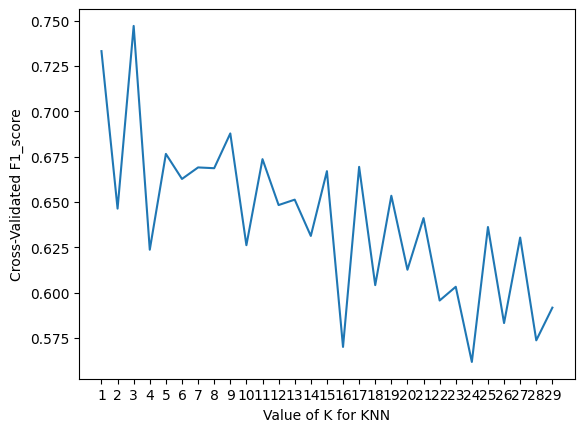

Optimal value of k: 3


In [8]:

#k cross validation to choose best value of K

F1_scores=[] #F1 scores array to choose the highest value
K_range=[k for k in np.arange(1,30) ]
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train,y_train, cv=10, scoring='f1')
    F1_scores.append(scores.mean())
#plotting
plt.plot(K_range, F1_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated F1_score')
plt.xticks(K_range)
plt.show()

optimal_k = K_range[np.argmax(F1_scores)]

# Print the optimal k value
print("Optimal value of k:", optimal_k)

from the cross validation we see that the best K is 3

[[148   3]
 [  9  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       151
           1       0.81      0.59      0.68        22

    accuracy                           0.93       173
   macro avg       0.88      0.79      0.82       173
weighted avg       0.93      0.93      0.93       173



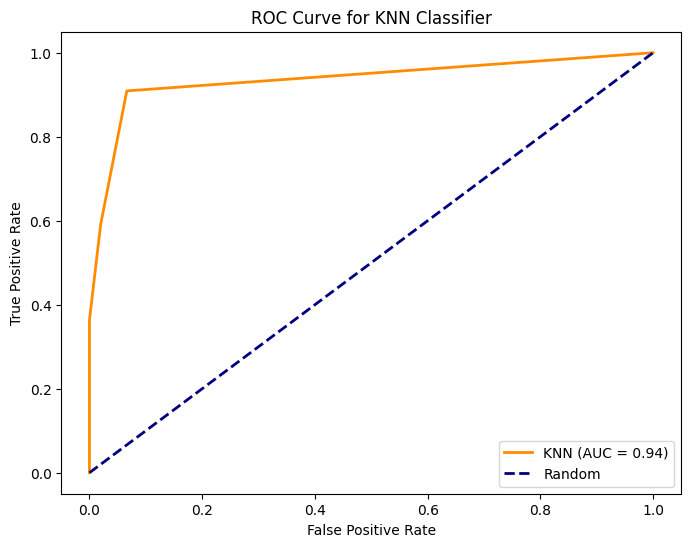

In [12]:

# create and fit the data into the model after getting the optimal K from the pervoius step
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
yknn_predict=knn.predict(X_both)

# Obtain predicted probabilities for the positive class
y_probs = knn.predict_proba(X_both)[:, 1]

# Compute the ROC curve
fpr_knn, tpr_knn, thresholds = roc_curve(y_both, y_probs)

roc_auc_knn = auc(fpr_knn, tpr_knn)

print(metrics.confusion_matrix(y_both, yknn_predict))
print("Classification Report:\n", classification_report(y_both, yknn_predict))



#create ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()

### 2-Logistic Regression


In [13]:
#Tuning hyperparamters
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['none','l1', 'l2'],
    'solver': ['newton-cg', 'liblinear']
}
LR_search = GridSearchCV(LR, param_grid = LRparam_grid, scoring='f1', refit = True, verbose = 1, cv=12)

# fitting the model for the search to get the best parameters
LR_search.fit(X_train , y_train)
paramters= []
paramters = list(LR_search.best_params_.values())
lr = LogisticRegression(C= paramters[0] , penalty= paramters[1], solver= paramters[2])


Fitting 12 folds for each of 36 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

[[146   5]
 [  7  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.75      0.68      0.71        22

    accuracy                           0.93       173
   macro avg       0.85      0.82      0.84       173
weighted avg       0.93      0.93      0.93       173



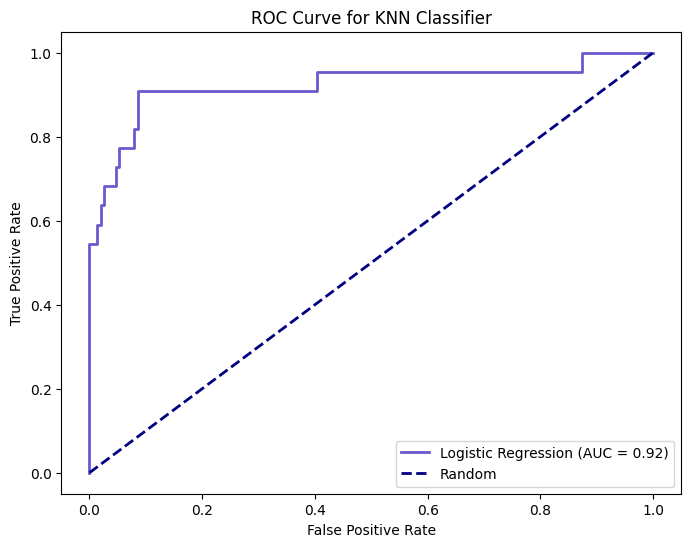

In [15]:
lr.fit(X_train, y_train)
ylr_predict = lr.predict(X_both)
print(metrics.confusion_matrix(y_both,ylr_predict ))

print("Classification Report:\n", classification_report(y_both, ylr_predict))
# Obtain predicted probabilities for the positive class
y_probs = lr.predict_proba(X_both)[:, 1]

# Compute the ROC curve
fpr_lr, tpr_lr, thresholds = roc_curve(y_both, y_probs)

# Compute(AUC)
roc_auc_lr = auc(fpr_lr, tpr_lr)

#create ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='slateblue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()

### 3-Naive bayes

[[ 46 105]
 [  2  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.30      0.46       151
           1       0.16      0.91      0.27        22

    accuracy                           0.38       173
   macro avg       0.56      0.61      0.37       173
weighted avg       0.86      0.38      0.44       173



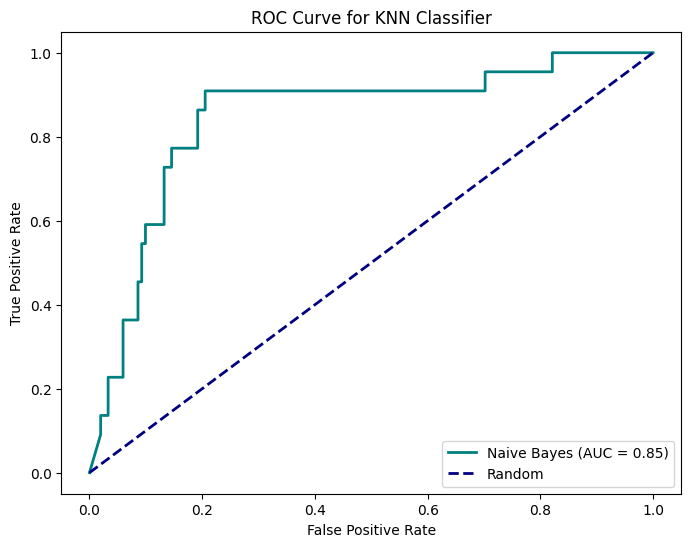

In [16]:
NB = GaussianNB()
NB.fit(X_train,y_train)
ynb_predict=NB.predict(X_both)

print(metrics.confusion_matrix(y_both, ynb_predict))

print("Classification Report:\n", classification_report(y_both, ynb_predict))
y_probs = NB.predict_proba(X_both)[:, 1]

# Compute the ROC curve
fpr_nb, tpr_nb, thresholds = roc_curve(y_both, y_probs)

# Compute the Area Under the Curve (AUC)
roc_auc_nb = auc(fpr_nb, tpr_nb)

#create ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='teal', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.show()


## plot the cruves for the first three classifiers

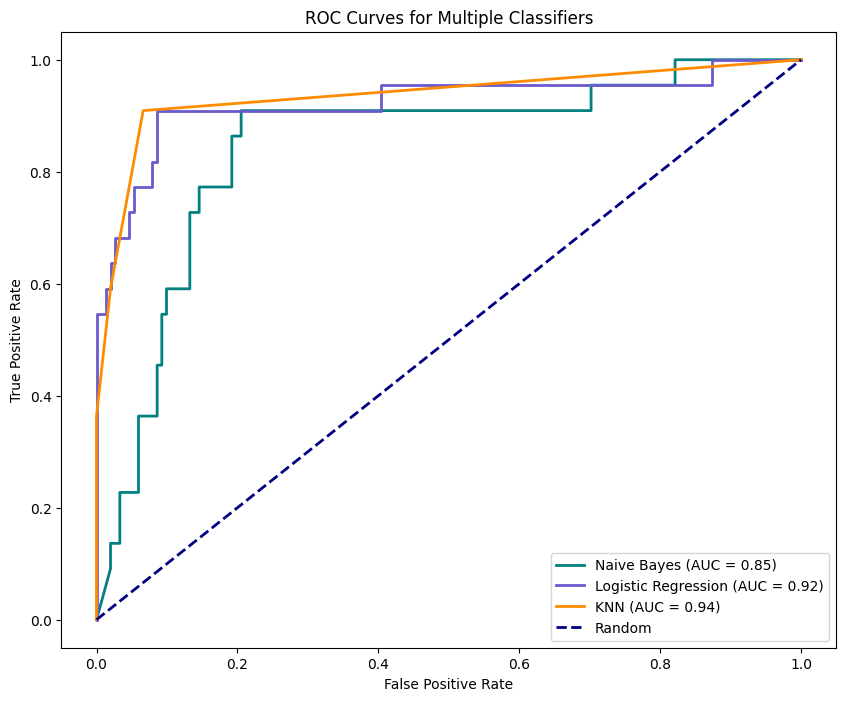

In [17]:
plt.figure(figsize=(10, 8))

# Naive Bayes ROC
plt.plot(fpr_nb, tpr_nb, color='teal', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))

# Logistic Regression ROC
plt.plot(fpr_lr, tpr_lr, color='slateblue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))


plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))

# Random line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Classifiers')
plt.legend(loc='lower right')

plt.show()



# Phase 2

# Decision tree classifer

In [18]:
tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [19]:
dtreeparam_grid = {

    'max_depth': np.arange(1,9),
    'max_features': np.arange(1,9),
    'random_state': [7]
}
tree_search = GridSearchCV(tree, param_grid = dtreeparam_grid, refit = True, verbose = 1, cv=7)
tree_search.fit(X_train , y_train)
parametres = []
parametres = list(tree_search.best_params_.values())

tree = DecisionTreeClassifier(criterion = "entropy", max_depth= parametres[0], max_features =parametres[1], random_state=7)
tree.fit(X_train, y_train)

Fitting 7 folds for each of 64 candidates, totalling 448 fits


DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=8,
                       random_state=7)

In [20]:
import graphviz


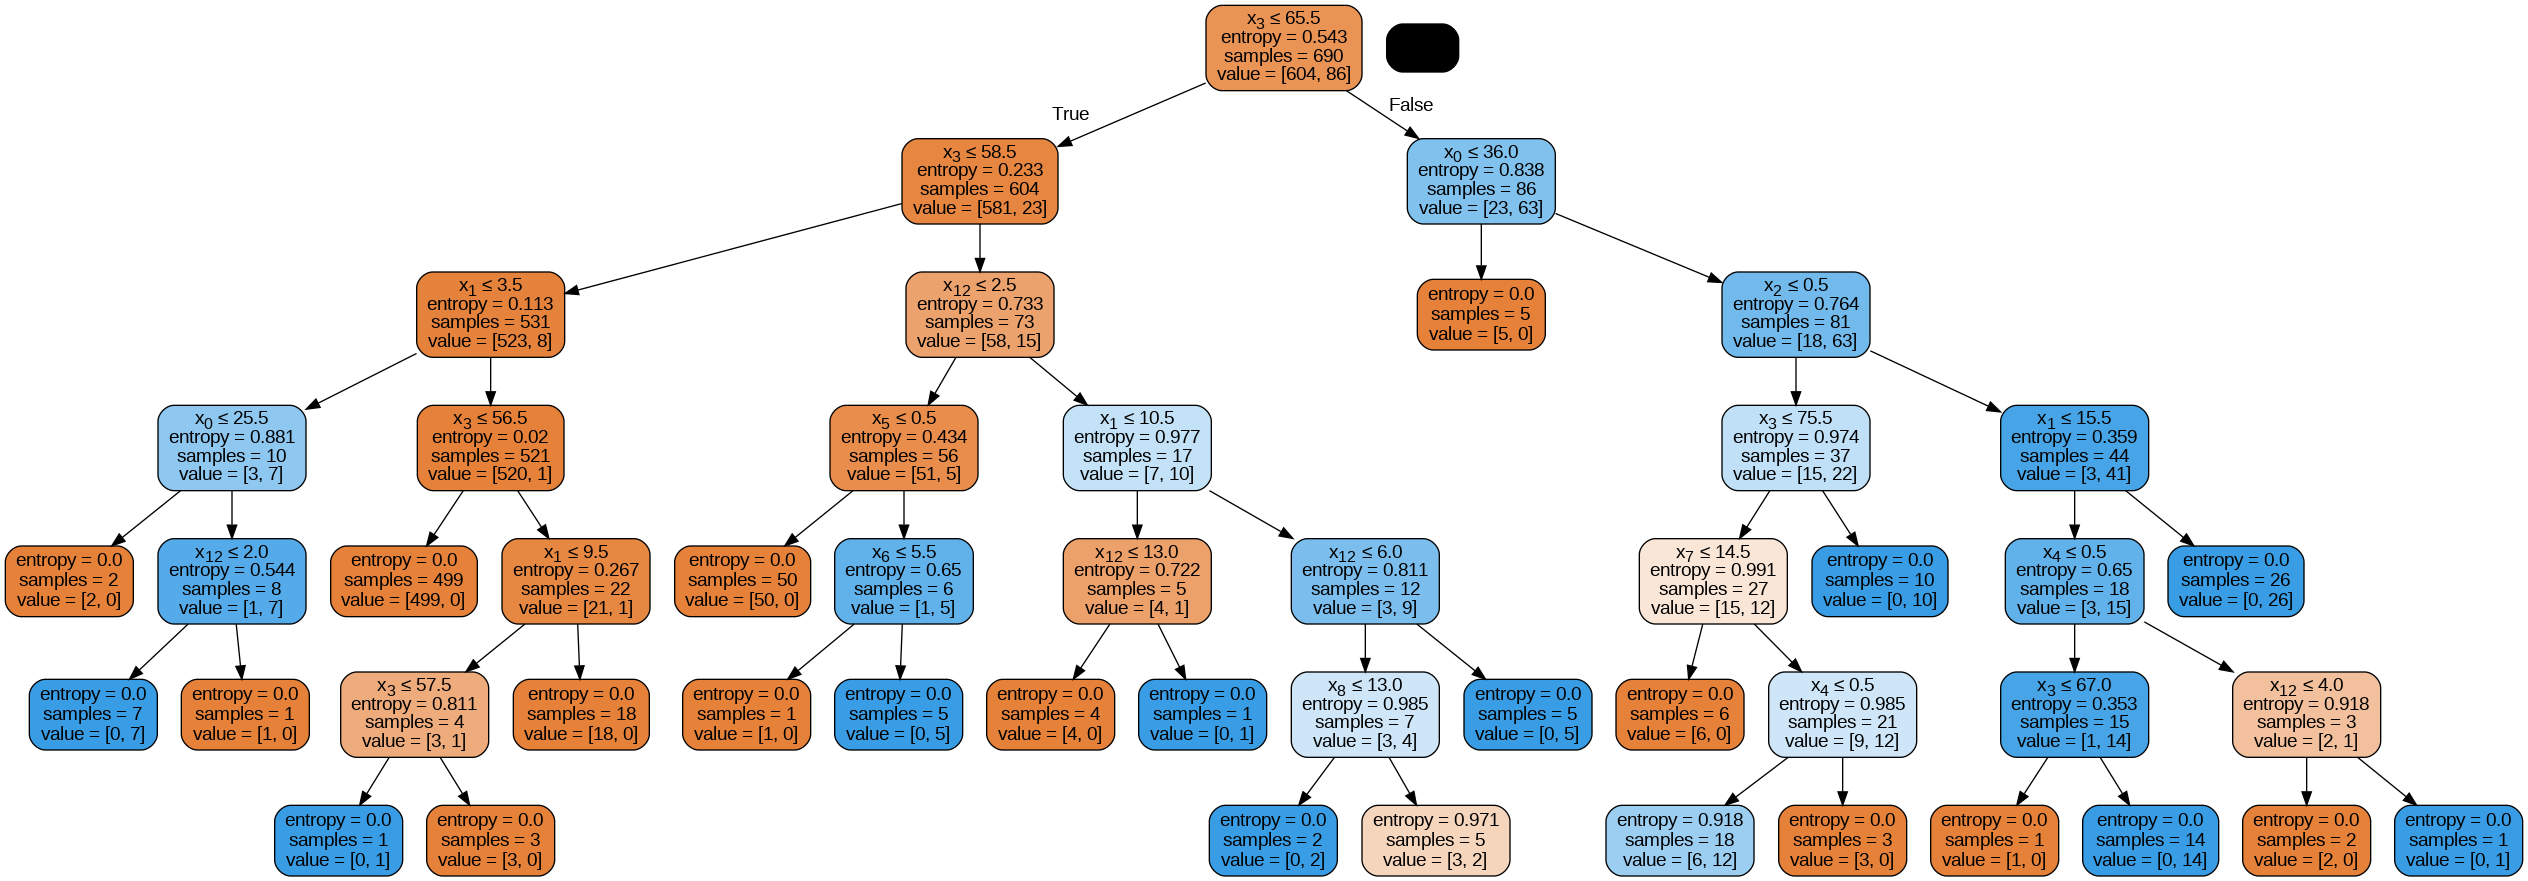

In [21]:
dot_data = StringIO()
export_graphviz(tree, out_file = dot_data, rounded = True, filled = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("dtree.png")
Image(graph.create_png())

Confusion Matrix:
 [[147   4]
 [  1  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.84      0.95      0.89        22

    accuracy                           0.97       173
   macro avg       0.92      0.96      0.94       173
weighted avg       0.97      0.97      0.97       173



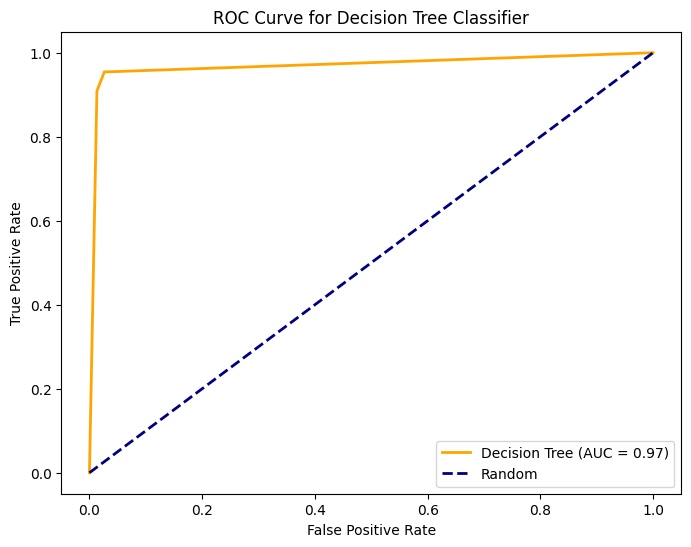

In [22]:
y_tree_predict = tree.predict(X_both)

# Confusion Matrix
print("Confusion Matrix:\n", metrics.confusion_matrix(y_both, y_tree_predict))

# Classification Report
print("Classification Report:\n", classification_report(y_both, y_tree_predict))

# ROC curve and AUC
y_tree_probs = tree.predict_proba(X_both)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_both, y_tree_probs)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='orange', lw=2, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_tree))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

## SVM

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create and fit the initial SVM model
svc = SVC()
svc.fit(X_train, y_train)

# Define the parameter grid for hyperparameter tuning
svc_param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': np.arange(15, 25),
    'random_state': [7],
    'C': np.arange(0, 2),
    'gamma': ['scale', 'auto']
}

# Use GridSearchCV for hyperparameter tuning
svc_search = GridSearchCV(svc, param_grid=svc_param_grid, refit=True, verbose=1, cv=4)
svc_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = svc_search.best_params_

# Create and fit the SVM model with the best parameters
best_svc = SVC(C=best_params['C'], degree=best_params['degree'], gamma=best_params['gamma'], kernel=best_params['kernel'], random_state=3)
best_svc.fit(X_train, y_train)


Fitting 4 folds for each of 120 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
280 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

SVC(C=1, degree=17, kernel='poly', random_state=3)

Confusion Matrix:
 [[150   1]
 [ 12  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       151
           1       0.91      0.45      0.61        22

    accuracy                           0.92       173
   macro avg       0.92      0.72      0.78       173
weighted avg       0.92      0.92      0.91       173



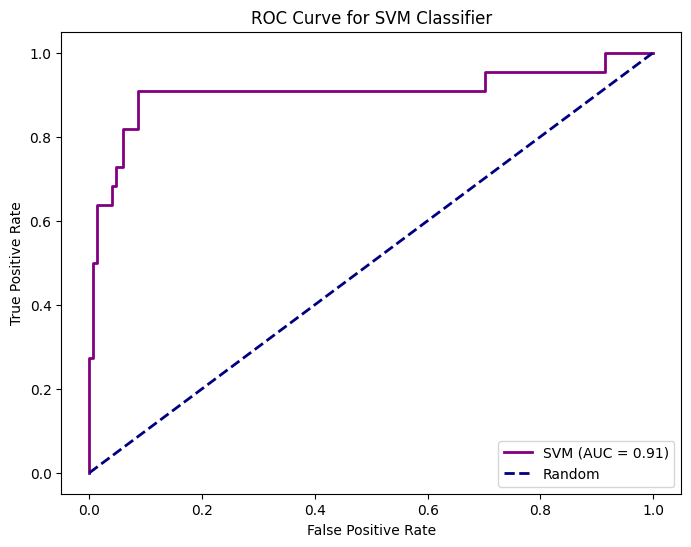

In [24]:
y_svc_predict = svc.predict(X_both)

# Confusion Matrix
print("Confusion Matrix:\n", metrics.confusion_matrix(y_both, y_svc_predict))

# Classification Report
print("Classification Report:\n", classification_report(y_both, y_svc_predict))

# ROC curve and AUC
y_svc_probs = svc.decision_function(X_both)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_both, y_svc_probs)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='purple', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc='lower right')
plt.show()

## Comparing AUC for All classifiers

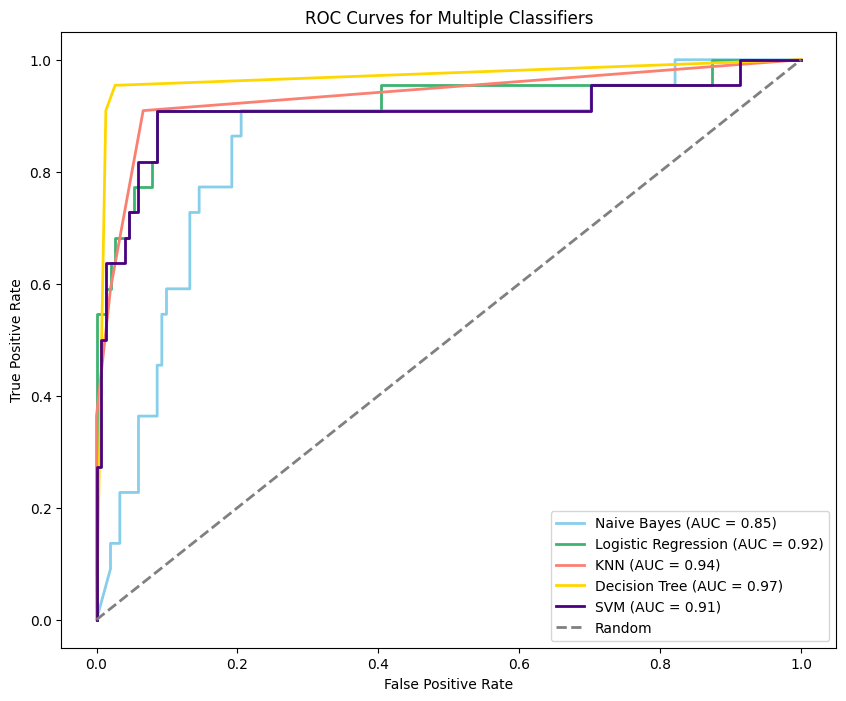

In [25]:
plt.figure(figsize=(10, 8))

# Naive Bayes ROC
plt.plot(fpr_nb, tpr_nb, color='skyblue', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))

# Logistic Regression ROC
plt.plot(fpr_lr, tpr_lr, color='mediumseagreen', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))

# KNN ROC
plt.plot(fpr_knn, tpr_knn, color='salmon', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))

# Decision Tree ROC
plt.plot(fpr_tree, tpr_tree, color='gold', lw=2, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_tree))

# SVM ROC
plt.plot(fpr_svc, tpr_svc, color='indigo', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svc))

# Random line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Classifiers')
plt.legend(loc='lower right')

plt.show()


# Confusion Matrix Comparison

Visualizing the confusion matrix for each classifier provides a detailed breakdown of their performance in terms of true positives, false positives, true negatives, and false negatives. This matrix is particularly helpful in understanding the classifier's ability to correctly classify instances and identify potential areas for improvement.


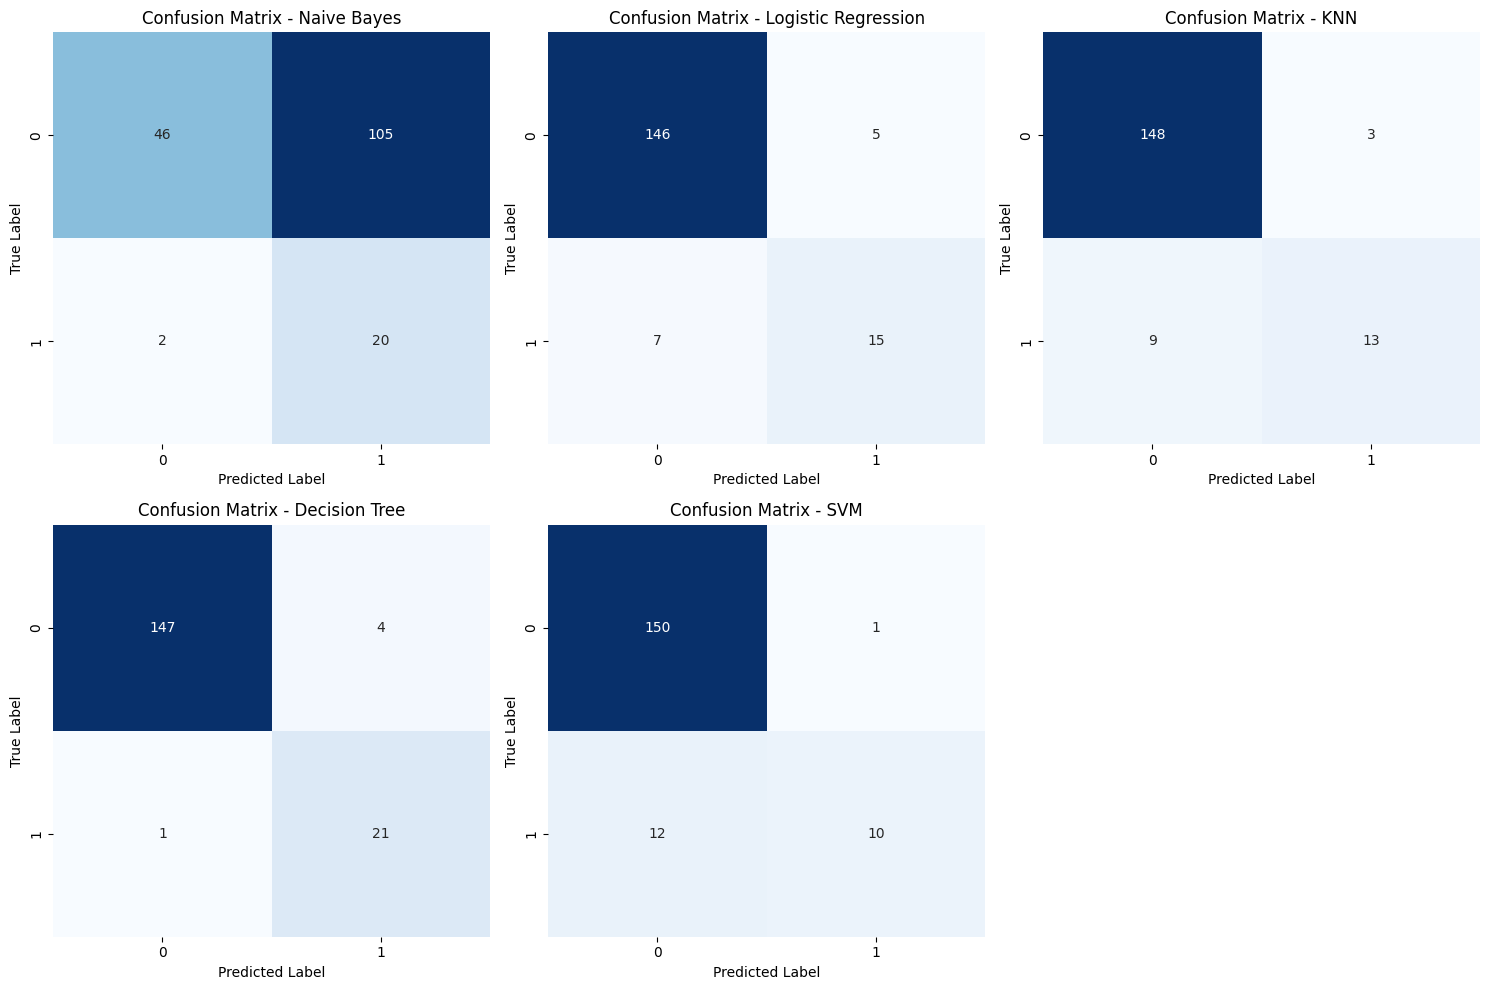

In [26]:

classifiers = ['Naive Bayes', 'Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
confusion_matrices = [metrics.confusion_matrix(y_both, ynb_predict), metrics.confusion_matrix(y_both, ylr_predict),
                      metrics.confusion_matrix(y_both, yknn_predict), metrics.confusion_matrix(y_both, y_tree_predict),
                      metrics.confusion_matrix(y_both, y_svc_predict)]

plt.figure(figsize=(15, 10))
for i, matrix in enumerate(confusion_matrices, 1):
    plt.subplot(2, 3, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {classifiers[i-1]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()


## Comparing F1 score , precision and recall for all classifiers

In [29]:
#report for KNN
print("Classification Report KNN:\n", classification_report(y_both, yknn_predict))
#report for logistic regression
print("Classification Report logistic regresssion:\n", classification_report(y_both, ylr_predict))
#report for naive bayes
print("Classification Report naive bayes:\n", classification_report(y_both, ynb_predict))
# report for decision tree
print("Classification Report decision tree:\n", classification_report(y_both, y_tree_predict))
# report for SVM
print("Classification Report SVM:\n", classification_report(y_both, y_svc_predict))


Classification Report KNN:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       151
           1       0.81      0.59      0.68        22

    accuracy                           0.93       173
   macro avg       0.88      0.79      0.82       173
weighted avg       0.93      0.93      0.93       173

Classification Report logistic regresssion:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.75      0.68      0.71        22

    accuracy                           0.93       173
   macro avg       0.85      0.82      0.84       173
weighted avg       0.93      0.93      0.93       173

Classification Report naive bayes:
               precision    recall  f1-score   support

           0       0.96      0.30      0.46       151
           1       0.16      0.91      0.27        22

    accuracy                           0.38       173
   macro avg       

## Based on comparisons between different classifiers as overall Decision tree have the highest performance